# Tensor Basic

김보람  
2023-07-14

## Ref

-   Book: 딥러닝 파이토치 교과서(서지영 지음, 길벗 출판사)

-   github: https://github.com/gilbutITbook/080289/tree/main

## Basic

In [1]:
import torch

In [2]:
print(torch.tensor([[1,2],[3,4]]))

tensor([[1, 2],
        [3, 4]])

In [3]:
print(torch.tensor([[1,2],[3,4]],device="cuda:0"))

tensor([[1, 2],
        [3, 4]], device='cuda:0')

In [4]:
print(torch.tensor([[1,2],[3,4]],dtype=torch.float64))

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

`-` ndarray 변환

In [5]:
temp = torch.tensor([[1,2],[3,4]])
print(temp.numpy())

[[1 2]
 [3 4]]

In [8]:
temp = torch.tensor([[1,2],[3,4]],device="cuda:0")
print(temp.to("cpu").numpy())

[[1 2]
 [3 4]]

`-` 텐서 차원 조작

In [9]:
temp = torch.tensor([[1,2],[3,4]])

In [11]:
temp.shape

In [12]:
temp.view(4,1)

In [13]:
temp.view(-1)

In [14]:
temp.view(1,-1)

In [15]:
temp.view(-1,1)

## 모델 정의

`-` nn.Module() 상속하여 정의

``` python
class MLP(Module):
    def __init__(self, inputs):
        super(MLP, self).__init__()
        self.layer = Linear(inputs,1) # 계층 정의
        self.activation = Sigmoid() # 활성화 함수 정의
        
    def forward(self, X):
        X = self.layer(X)
        X = self.activation(X)
        return X
```

`-` Sequential 신경망 정의하는 방법

``` python
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2))
        
        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True))
        
        def forward(self,x):
            x = self.layer1(x)
            x = self.layer2(x)
            x = x.view(x.shape[0],-1)
            x = slelf.layer3(x)
            return x
        
    model = MLP()   # 모델에 대한 객체 생성
        
```

## 모델의 파라미터 정의

`-` 손실 함수 (loss function)

-   $y$와 $\hat y$의 오차를 구해서 모델의 정확성을 측정

-   BCELoss: 이진 분류

-   CrossEntropyLoss: 다중 클래스 분류

-   MSELoss: 회귀 모델

`-` 옵티마이저 (optimizer)

-   데이터의 손실 함수를 바탕으로 모델의 업데이트 방법 결정

-   `torch.optim.Optimizer(params, defaults)`는 옵티마이저 기본 클래스

-   `zero_grad()` 옵티마이저 사용된 파라미터의 기울기 0으로

-   `torch.optim.lr_scheduler` 에폭에 따라 학습률 조절

-   종류

\<optim Adadelta, optim.Adagrad, optim.Adam, optim.SparseAdam,
optim.Adamax\>

\<optim.ASGD, optim.LBFGS\>

\<optim.RMSProp, optim.Rprop, optim.SGD\>

## 모델 훈련

`-` 예시 코드

``` python
for epoch in range(100):
    yhat = model(x_train)
    loss = criterion(yhat, y_train)
    optimizer.zero_gard()
    loss.backward()
    optimizer.step()
```

## 예시

In [1]:

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('car_evaluation.csv')

In [3]:
dataset.head()

-   **output(차상태)**: unacc(허용 불가능한 수준), 양호(good), 매우
    좋은(very good, vgood)

In [4]:
dataset.head()

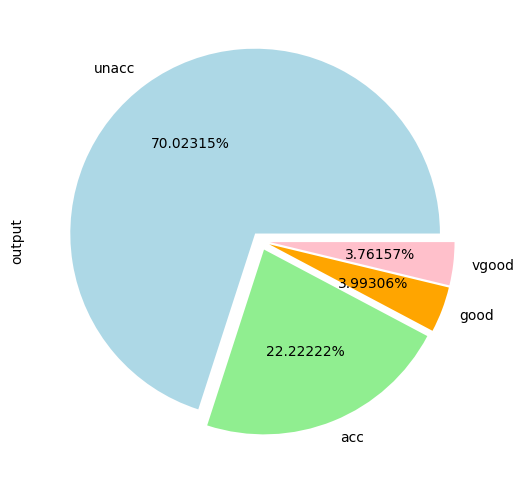

In [5]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))

In [5]:
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

In [6]:
for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')

-   astype() 메서드를 이용하여 데이터를 범주형으로 변환

`-` 범주형 데이터를 텐서로 변환하기 위해서는

**범주형 데이터 -\> dataser\[category\] -\> 넘파이 배열(NumPy array) -\>
텐서(Tensor)**

In [7]:
price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

`-` 배열 텐서로 변환

In [8]:
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

`-` 레이블(outputs) 사용할 칼럼을 텐서로 변환

In [9]:
outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])

> note: **revel(), reshape(), flatten()**
>
> 텐서 차원 변경

In [10]:
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]

`-` test/train

In [11]:
total_records = 1728
test_records = int(total_records * .2)   # 20%만 테스트 용도로 사용

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [12]:
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345

`-` 네트워크 생성

In [13]:
class Model(nn.Module):
    def __init__(self, embedding_size, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)
        
        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols 

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i)) # 배치정규화.. 평균0 분산 1
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x

In [14]:
model = Model(categorical_embedding_sizes, 4, [200,100,50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)

In [15]:

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [17]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [ ]:
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)
for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)   # 반복할 때마다 오차 aggregated_losses에 추가

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()   # 가중치 업데이트
    optimizer.step()         # 기울기 업데이트

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

In [ ]:
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
    y_val = model(categorical_test_data)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

In [ ]:
print(y_val[:5])

In [ ]:
y_val = np.argmax(y_val, axis=1)
print(y_val[:5])

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))